<a href="https://colab.research.google.com/github/gaditi123/Technical-Indicators-FA-Project/blob/main/Using_EMA_30_50_100_%2B_RSI_%2B_MFI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 62 kB 428 kB/s 
     |████████████████████████████████| 6.4 MB 10.6 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.28.0 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [4]:
!pip install pandas_ta

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 115 kB 5.2 MB/s 
  Created wheel for pandas-ta: filename=pandas_ta-0.3.14b0-py3-none-any.whl size=218923 sha256=1c67871a91fd22240e90d77fb4e8531b996003a5aa533d79c73a3dafe3b75553
  Stored in directory: /root/.cache/pip/wheels/0b/81/f0/cca85757840e4616a2c6b9fe12569d97d324c27cac60724c58
Successfully built pandas-ta


In [5]:
import numpy as np
import pandas as pd
import yfinance as yf
import pandas_datareader.data as web
import pandas_ta as ta
import matplotlib.pyplot as plt
from datetime import date
plt.style.use('fivethirtyeight')
yf.pdr_override()

In [93]:
stocksymbols = ['SBIN.NS']
startdate = date(2015,1,1)
end_date = date(2019,12,31)
print(end_date)
def getMyPortfolio(stocks = stocksymbols ,start = startdate , end = end_date):
    data = web.get_data_yahoo(stocks , data_source='yahoo' , start = start ,end= end )
    return data

2019-12-31


In [94]:
df = getMyPortfolio(stocksymbols)


[*********************100%***********************]  1 of 1 completed


In [95]:
CustomStrategy = ta.Strategy(
    name="Defining Various TI to be used",
    description="MFI,RSI & EMA 30,50,100",
    ta=[
        {"kind": "mfi",}, #volume
        {"kind": "rsi"}, #momentum
        {"kind": "ema", "length": 14}, #trend
        {"kind": "ema", "length": 50}, #trend
        {"kind": "ema", "length": 100}, #trend
        {"kind" : "obv"},
    ]
)
df.ta.strategy(CustomStrategy)

In [96]:
df.rename(columns = {'EMA_14':'Short', 'EMA_50':'Middle', 'EMA_100':'Long'}, inplace = True)
df['OBV_EMA'] = df['OBV'].ewm(span=14).mean()

In [97]:
df.tail(200)

,Open,High,Low,Close,Adj Close,Volume,MFI_14,RSI_14,Short,Middle,Long,OBV,OBV_EMA
Date,,,,,,,,,,,,,
2019-03-01,270.549988,274.600006,270.100006,272.950012,266.297180,20024726,50.291082,46.140961,271.371383,280.383889,281.899108,136852144.0,1.050424e+08
2019-03-05,271.700012,277.850006,271.200012,276.450012,269.711884,21533972,57.355134,50.430160,272.048533,280.229619,281.791205,158386116.0,1.121549e+08
2019-03-06,277.299988,282.549988,276.450012,278.100006,271.321655,22161376,64.158665,52.356446,272.855396,280.146105,281.718112,180547492.0,1.212739e+08
2019-03-07,279.450012,282.500000,277.649994,281.750000,274.882660,14899105,72.527764,56.393368,274.041344,280.209003,281.718743,195446597.0,1.311636e+08
2019-03-08,281.850006,284.250000,279.600006,281.200012,274.346100,19943319,80.987763,55.628495,274.995833,280.247866,281.708471,175503278.0,1.370755e+08
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-23,335.700012,338.850006,330.350006,332.399994,324.298157,30150335,36.291109,55.111574,329.482358,317.397523,311.298579,848034653.0,8.530043e+08
2019-12-24,333.200012,334.200012,329.200012,331.450012,323.371307,21747782,31.458883,54.357410,329.744712,317.948601,311.697617,826286871.0,8.494420e+08
2019-12-26,333.000000,333.450012,328.100006,329.850006,321.810303,24616942,31.856480,53.040899,329.758751,318.415323,312.057070,801669929.0,8.430724e+08


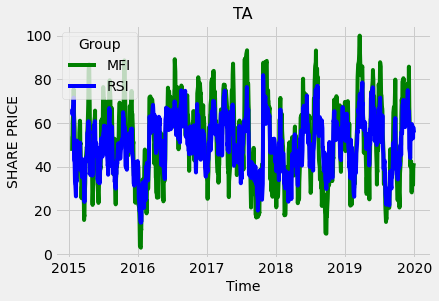

In [98]:
plt.plot(df['MFI_14'], label='MFI', color='green')
plt.plot(df['RSI_14'], label='RSI', color='blue')

#add legend
plt.legend(title='Group')

#add axes labels and a title
plt.ylabel('SHARE PRICE', fontsize=14)
plt.xlabel('Time', fontsize=14)
plt.title('TA', fontsize=16)

#display plot
plt.show()

In [99]:
def buy_sell_function(data):
  buysig = []
  buyprice = []
  flag_long = False
  flag_short = False
  for i in range(0,len(data)):
    if data['Middle'][i] < data['Long'][i] and data['Middle'][i] > data['Short'][i] and flag_long == False and flag_short == False:
        buysig.append(1)
        buyprice.append(data['Close'][i])
        flag_short = True
    elif data['Middle'][i] > data['Long'][i] and data['Middle'][i] < data['Short'][i] and flag_short == False and flag_long == False:
        buysig.append(1)
        buyprice.append(data['Close'][i])
        flag_long = True
    elif flag_short == True and data['Short'][i] > data['Middle'][i]:
        buyprice.append(data['Close'][i])
        buysig.append(-1)
        flag_short = False
    elif flag_long == True and data['Short'][i] < data['Middle'][i]:
        buyprice.append(data['Close'][i])
        buysig.append(-1)
        flag_long = False
    else:
        buysig.append(0)
        buyprice.append(data['Close'][i])
  return (buysig, buyprice)

df['buysignal'] = buy_sell_function(df)[0]
df['buyprice'] =buy_sell_function(df)[1]

In [100]:
mfi=df['MFI_14']
rsi=df['RSI_14']
mfisig=[]
for i in range(len(mfi)):
  if mfi[i]>80:
    mfisig.append(-1)
  elif mfi[i]<20:
    mfisig.append(1)
  else:
    mfisig.append(0)

In [101]:
rsi=df['RSI_14']
rsisig=[]
for i in range(len(rsi)):
  if rsi[i]>70:
    rsisig.append(-1)
  elif rsi[i]<30:
    rsisig.append(1)
  else:
    rsisig.append(0)

In [102]:
obv=df['OBV']
obvema = df['OBV_EMA']
obvsig=[]
for i in range(len(rsi)):
  if obv[i]<obvema[i]:
    obvsig.append(-1)
  elif obv[i]>obvema[i]:
    obvsig.append(1)
  else:
    obvsig.append(0)

In [103]:
bs=df['buysignal']
ss=df['buyprice']
ct=0
for i in range(len(bs)):
  if(bs[i]==1 and mfisig[i]==1):
    ct+=1
print(ct)

0


In [104]:
df

,Open,High,Low,Close,Adj Close,Volume,MFI_14,RSI_14,Short,Middle,Long,OBV,OBV_EMA,buysignal,buyprice
Date,,,,,,,,,,,,,,,
2015-01-01,312.450012,315.000000,310.700012,314.000000,295.929230,6138488,NaN,NaN,NaN,NaN,NaN,6138488.0,6.138488e+06,0,314.000000
2015-01-02,314.350006,318.299988,314.350006,315.250000,297.107269,9935094,NaN,NaN,NaN,NaN,NaN,16073582.0,1.146086e+07,0,315.250000
2015-01-05,316.250000,316.799988,312.100006,312.750000,294.751129,9136716,NaN,NaN,NaN,NaN,NaN,6936866.0,9.732679e+06,0,312.750000
2015-01-06,310.000000,311.100006,298.700012,299.899994,282.640656,15329257,NaN,NaN,NaN,NaN,NaN,-8392391.0,4.187709e+06,0,299.899994
2015-01-07,300.000000,302.549988,295.149994,300.149994,282.876251,15046745,NaN,NaN,NaN,NaN,NaN,6654354.0,4.831253e+06,0,300.149994
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-23,335.700012,338.850006,330.350006,332.399994,324.298157,30150335,36.291109,55.111574,329.482358,317.397523,311.298579,848034653.0,8.530043e+08,0,332.399994
2019-12-24,333.200012,334.200012,329.200012,331.450012,323.371307,21747782,31.458883,54.357410,329.744712,317.948601,311.697617,826286871.0,8.494420e+08,0,331.450012
2019-12-26,333.000000,333.450012,328.100006,329.850006,321.810303,24616942,31.856480,53.040899,329.758751,318.415323,312.057070,801669929.0,8.430724e+08,0,329.850006


In [107]:
tp=0
fl=0
bp=0
initial_buy_price = 0
first_buy = False
for i in range(len(bs)):
  val=bs[i]*50 + mfisig[i]*50 + rsisig[i]*50 + obvsig[i]*50
  if val>=100 and fl==0:
    tp-=ss[i]
    fl=1
    bp=ss[i]
    if first_buy==False:
      initial_buy_price = ss[i]
      first_buy = True
    print('Buy :'+ str(ss[i]))
  elif val<=-50 and fl==1:
    tp+=ss[i]
    fl=0
    print('Sell :'+ str(ss[i]))    

if(fl==1):
    tp+=bp

print(tp)
print("Profit percentage : ", (tp/initial_buy_price)*100)

Buy :266.45001220703125
Sell :277.54998779296875
Buy :290.8999938964844
Sell :279.6499938964844
Buy :291.0
Sell :312.5
Buy :329.8999938964844
Sell :312.1000061035156
Buy :285.3999938964844
Sell :275.6499938964844
Buy :293.6499938964844
Sell :284.3999938964844
Buy :335.5
Sell :320.0
-30.95001220703125
Profit percentage :  -11.615691795496387
